Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [49]:
#reading in file 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')

df.head()
print(df.shape)

#https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv

(2693, 5)


In [50]:
#renaming Year and Guest List
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

df.head(3)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman


In [51]:
df['GoogleKnowlege_Occupation'].value_counts()

actor                                                596
actress                                              271
journalist                                           180
author                                               102
Journalist                                            72
                                                    ... 
former omb director                                    1
former director of the national economic counscil      1
guitarist                                              1
Scholar                                                1
Comic                                                  1
Name: GoogleKnowlege_Occupation, Length: 398, dtype: int64

In [52]:
#Grouping more common guest occupations into smaller, condensed groups and using a function to loop through the Group column & create new Occupation Column


def grab_occupations(group):
  if group in ['Acting', 'Comedy', 'Musician']:
      return 'Acting, Comedy & Music'
  elif group in ['Media', 'media']:
    return 'Media'
  elif group in ['Government', 'Politician', 'Political Aide']:
    return 'Government and Politics'
  else:
    return 'Other'
#Creating a new Occupation column by grabbing 'Group' column and applying the function above to it
df['Occupation'] = df ['Group'].apply(grab_occupations)

df.head()


,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [53]:
#using crosstab to create a table  with % of guests according to their occupation
#setting normalize to “index” iterates over each row & applies normalize - not over columns. 
ct = pd.crosstab(df.Year, df.Occupation,  normalize='index')*100

ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.361446,1.204819,6.626506,1.807229
2000,73.964497,8.284024,12.426036,5.325444
2001,72.611465,3.821656,19.745223,3.821656
2002,62.264151,6.918239,26.415094,4.402516
2003,56.024096,10.240964,24.698795,9.036145
2004,38.414634,22.560976,27.439024,11.585366
2005,37.037037,16.049383,33.333333,13.580247
2006,36.024845,19.254658,29.192547,15.527950
2007,25.531915,17.021277,33.333333,24.113475


In [54]:
#dropping 'other' column because it is unecessary
ct = ct.drop(columns=['Other'])
ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,90.361446,1.204819,6.626506
2000,73.964497,8.284024,12.426036
2001,72.611465,3.821656,19.745223
2002,62.264151,6.918239,26.415094
2003,56.024096,10.240964,24.698795
2004,38.414634,22.560976,27.439024
2005,37.037037,16.049383,33.333333
2006,36.024845,19.254658,29.192547
2007,25.531915,17.021277,33.333333


In [55]:
#making a list of years to use later
year = ct.index.tolist()
year

[1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

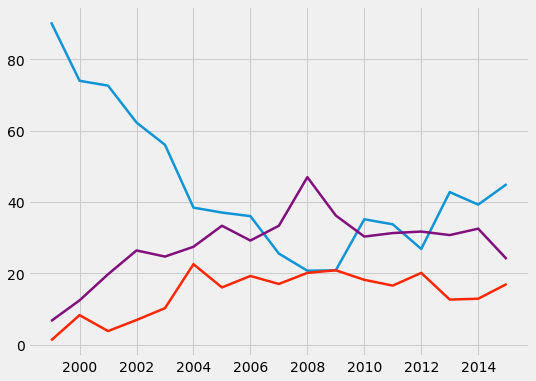

In [56]:
#initial plot

#setting fivethirtyeight style
plt.style.use('fivethirtyeight')

#setting size
fig, ax = plt.subplots(figsize=(8,6))

#plotting each occupation category, color, length/width
ax1 = sns.lineplot(x=year, y=ct['Acting, Comedy & Music'].tolist(), color='#0F95D7', lw=2.5)
ax1 = sns.lineplot(x=year, y=ct['Government and Politics'].tolist(), color='#FF2700', lw=2.5)
ax1 = sns.lineplot(x=year, y=ct['Media'].tolist(), color='#810F7C', lw=2.5)

[Text(0, 0, '2000'),
 Text(0, 0, '2004'),
 Text(0, 0, '2008'),
 Text(0, 0, '2012')]

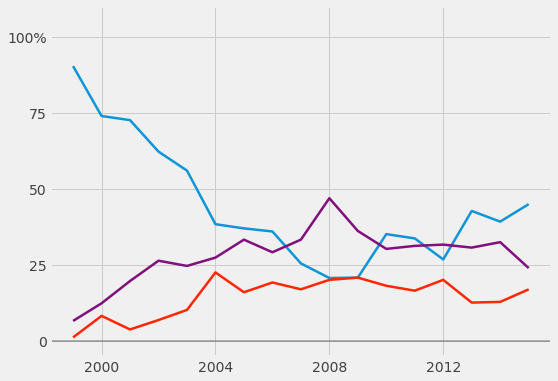

In [57]:
#increasing length of grid lines on y-axis + adding horizontal line at baseline

#setting fivethirtyeight style
plt.style.use('fivethirtyeight')

#setting size
fig, ax = plt.subplots(figsize=(8,6))

#plotting each occupation category
ax1 = sns.lineplot(x=year, y=ct['Acting, Comedy & Music'].tolist(), color='#0F95D7', lw=2.5)
ax2 = sns.lineplot(x=year, y=ct['Government and Politics'].tolist(), color='#FF2700', lw=2.5)
ax3 = sns.lineplot(x=year, y=ct['Media'].tolist(), color='#810F7C', lw=2.5)

#Y axis past 0 & above 100 -- grid line will pass 0 & 100 <---->
plt.ylim(-5,110)

#bolded horizontal line at y=0
ax1.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)


#adjusting x/y labels

#y-labels
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14, color='#414141')

#x-labels & names
ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticklabels(['2000', '2004', '2008', '2012'], fontsize=14, color='#414141')

In [58]:
#Title & Subtitle
ax.text(x=1996.7, y=118, s="Who's been a guest on 'The Daily Show'", fontsize=18.5, fontweight='semibold', color='#414141')
ax.text(x=1996.7, y=112, s='Occupation of guests, by year', fontsize=16.5, color='#414141')

#Text labels per each plotted line
ax.text(x=2000.5, y=81, s="Acting, Comedy & Music", fontsize=13, fontweight='semibold', color='#810f7c')
ax.text(x=2008.5, y=6, s="Government and Politics", fontsize=13, fontweight='semibold', color='#FF2700')
ax.text(x=2007.1, y=62, s="Media", fontsize=13, fontweight='semibold', color='#810F7C')



Text(2007.1, 62, 'Media')

In [0]:
plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here